In [19]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from implementations import *
from losses import *
from EDA import *
from plots import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Class 0 graphical exploration 

## Load the training data into feature matrix, class labels, and event ids:
***

In [20]:
DATA_TRAIN_PATH = "../data/train.csv"
data_y, data_set, ids = load_csv_data(DATA_TRAIN_PATH)

In [21]:
# Fixing the seed
seed = 8

### Split and classify data

In [30]:
# Classification of the output
y_0, y_1, y_2, y_3 = y_classification(data_y, data_set)

In [31]:
#EDA for each class
class_0, class_1, class_2, class_3 = EDA_class(data_set)
print(class_0.shape)
print(class_1.shape)
print(class_2.shape)
print(class_3.shape)

(99913, 15)
(77544, 21)
(50379, 29)
(22164, 27)


## Correlation matrix
***

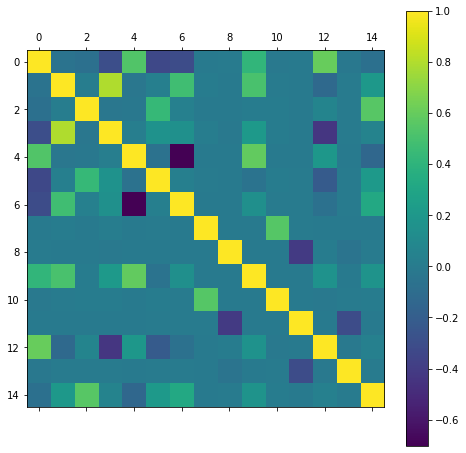

In [32]:
correlation_plot(class_0)

No correlated features to delete

## Histograms
***

/Users/gaspardvilla/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


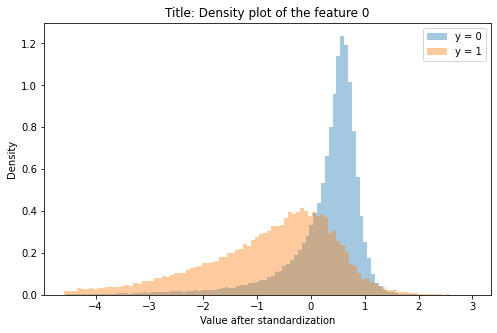

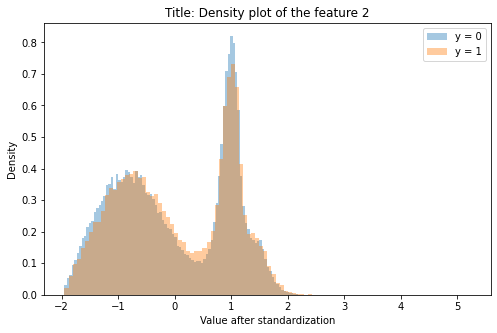

In [34]:
histogram_plot(y_0, class_0)

We see that for features 3, 6, 9, 12 and 14 we gain no information in predicting y (same density for y = 0 and y = 1).

In [12]:
class_0 = remove_feature(class_0, np.array([3, 6, 9, 12, 14]))

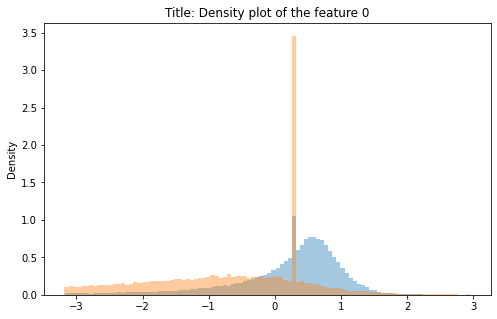

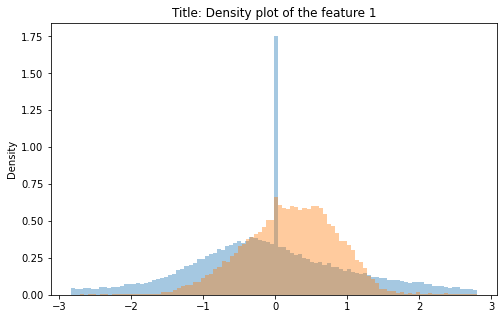

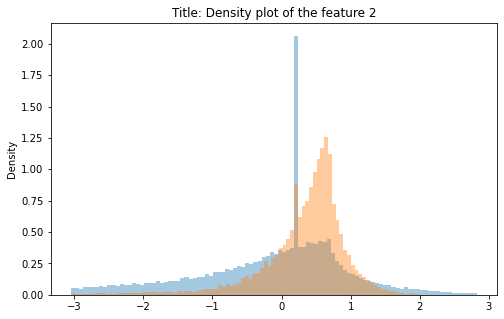

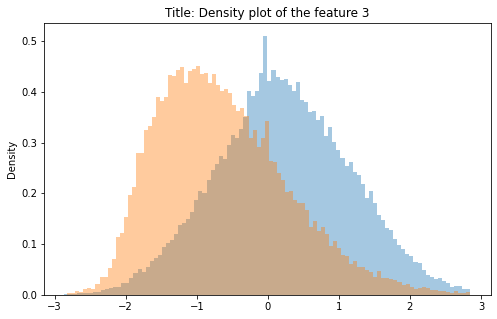

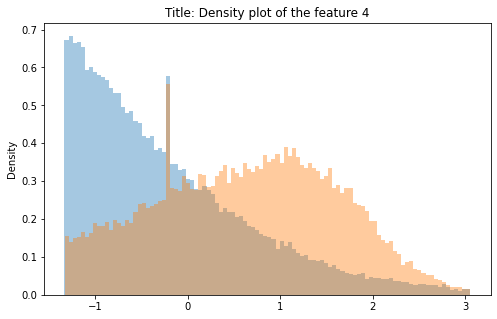

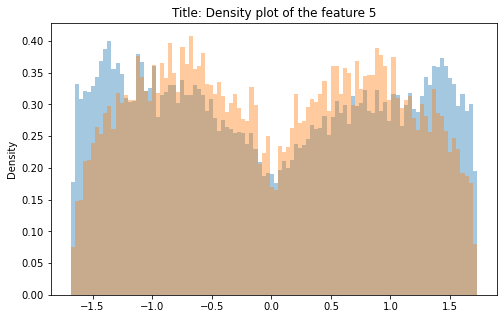

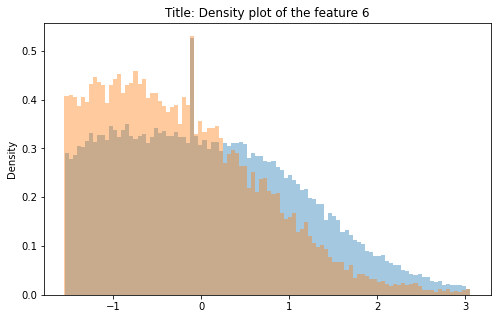

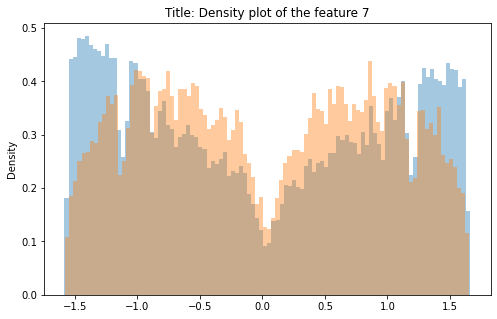

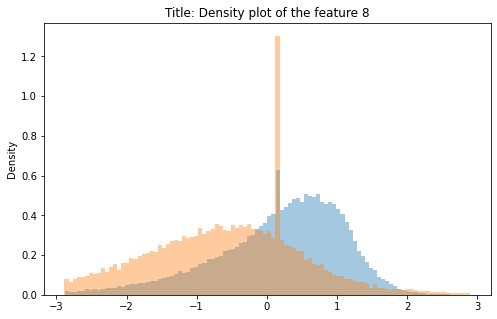

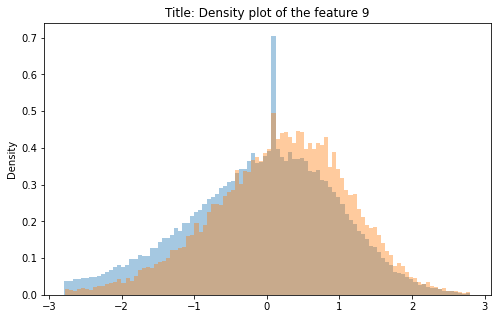

In [30]:
class_0, class_1, class_2, class_3 = graph_analysis_removal(class_0, class_1, class_2, class_3)
histogram_plot(y_0, class_0)

## Density plots

***

In [ ]:
for i in range (class_0.shape[1]):
    for j in range (class_0.shape[1]):
        if (i!=j):
            density_plot(class_0, i, j)

Maybe we could also remove features 8, 10, 15

In [ ]:
def classic_cv(y_, class_, parameters, idx):
    seed = parameters.seeds[0]

    # split data in k fold
    k_indices = build_k_indices(y_, parameters.k_fold, seed)
    # define lists to store the loss of training data and test data
    error_te = []
    error_tr = []

    for param in parameters.range(idx):
        parameters.set_param(idx, param)
        error_tr_i = [-1]
        error_te_i = [-1]

        for k in range(parameters.k_fold):
            # cross validation:
            percentage_error_tr, percentage_error_te = \
                method_evaluation(y_, class_, parameters, k_indices, k)
            error_tr_i = np.c_[error_tr_i, [percentage_error_tr]]
            error_te_i = np.c_[error_te_i, [percentage_error_te]]

        error_tr.append(np.mean(error_tr_i[0, 1:]))
        error_te.append(np.mean(error_te_i[0, 1:]))

    best_param = parameters.range(idx)[np.argmin(error_te)]
    parameters.set_best_param(idx, best_param)
    parameters.set_param(idx, best_param)
    parameters.set_best_error(np.min(error_te))

    # Display the results
    min_test_error = np.min(error_te)
    if parameters.viz:
        print('Test error: ' +str(min_test_error)+ '\nBest ' \
            +str(parameters.names[idx-1])+ ': ' +str(parameters.best_param(idx)))

    # Visualization
    if parameters.viz:
        cross_validation_visualization(parameters.range(idx), error_tr, error_te, parameters)
    
    return parameters

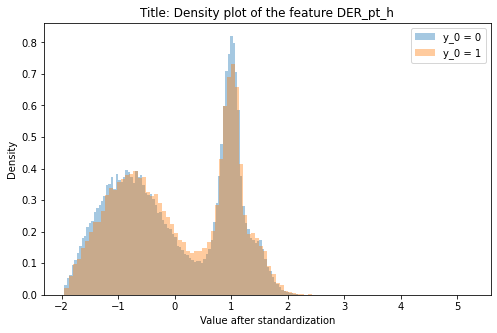

In [47]:
zero_ind = np.array(np.where(y_0 == 0)[0])
unit_ind = np.array(np.where(y_0 == 1)[0])
col = 2

plt.figure(figsize=(8,5))
sns.distplot(class_0[zero_ind, col], bins=100,  kde=False, label='y_0 = 0', norm_hist=True)
sns.distplot(class_0[unit_ind, col], bins=100,  kde=False, label='y_0 = 1', norm_hist=True)
plt.title('Title: Density plot of the feature DER_pt_h')
plt.ylabel('Density')
plt.xlabel('Value after standardization')
plt.legend()
plt.savefig('hist_class_0_feature_2.jpeg')
plt.show()

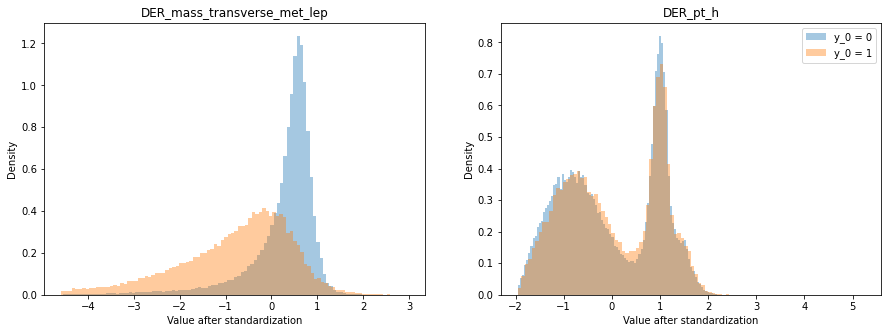

In [63]:
zero_ind = np.array(np.where(y_0 == 0)[0])
unit_ind = np.array(np.where(y_0 == 1)[0])
col = 2

fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.distplot(class_0[zero_ind, 0], bins=100, kde=False, label='y_0 = 0', norm_hist=True, ax = axes[0])
sns.distplot(class_0[unit_ind, 0], bins=100, kde=False, label='y_0 = 1', norm_hist=True, ax = axes[0])


sns.distplot(class_0[zero_ind, col], bins=100,  kde=False, label='y_0 = 0', norm_hist=True, ax = axes[1])
sns.distplot(class_0[unit_ind, col], bins=100,  kde=False, label='y_0 = 1', norm_hist=True, ax = axes[1])

plt.title('Title: Density plot of the feature DER_pt_h')
plt.ylabel('Density')
plt.xlabel('Value after standardization')
axes[0].set_title("DER_mass_transverse_met_lep")
axes[0].set_xlabel('Value after standardization')
axes[0].set_ylabel('Density')
axes[1].set_title("DER_pt_h")
plt.savefig('denstity_class_0.jpeg')
plt.legend()
plt.show()

Text(0.5, 0.98, 'Main')

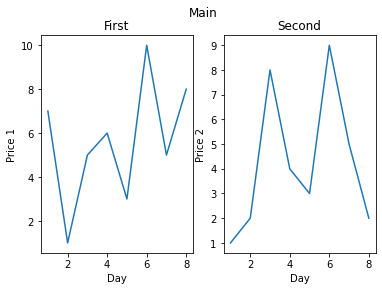

In [48]:
df = pd.DataFrame({"Price 1": [7,1,5,6,3,10,5,8],
                    "Price 2" : [1,2,8,4,3,9,5,2],
                      "Day":[1,2,3,4,5,6,7,8]})


fig, axes = plt.subplots(1, 2)

sns.lineplot(x = 'Day', y = 'Price 1',data = df, ax = axes[0])
sns.lineplot(x = 'Day', y = 'Price 2',data = df, ax = axes[1])
axes[0].set_title("First")
axes[1].set_title("Second")
plt.suptitle("Main")